In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston
boston = load_boston()

# データフレームにする
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# 目的変数（PRICE）を追加してデータフレームを確認
df['PRICE'] = pd.DataFrame(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


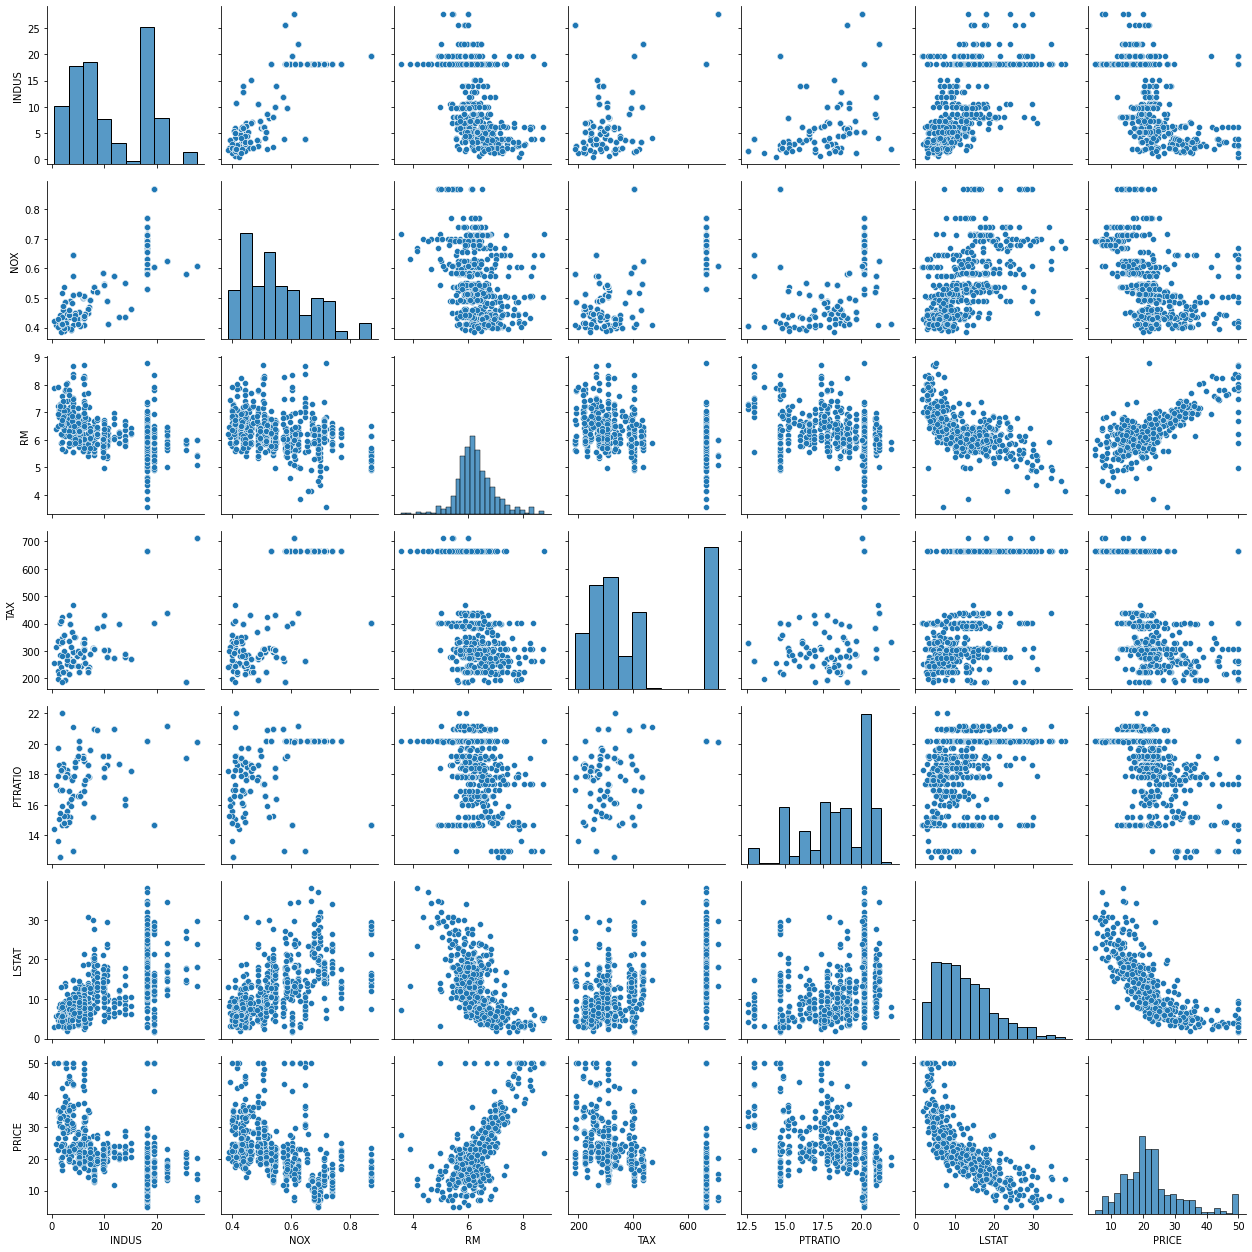

In [ ]:
# データの可視化
cols = ['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','PRICE']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

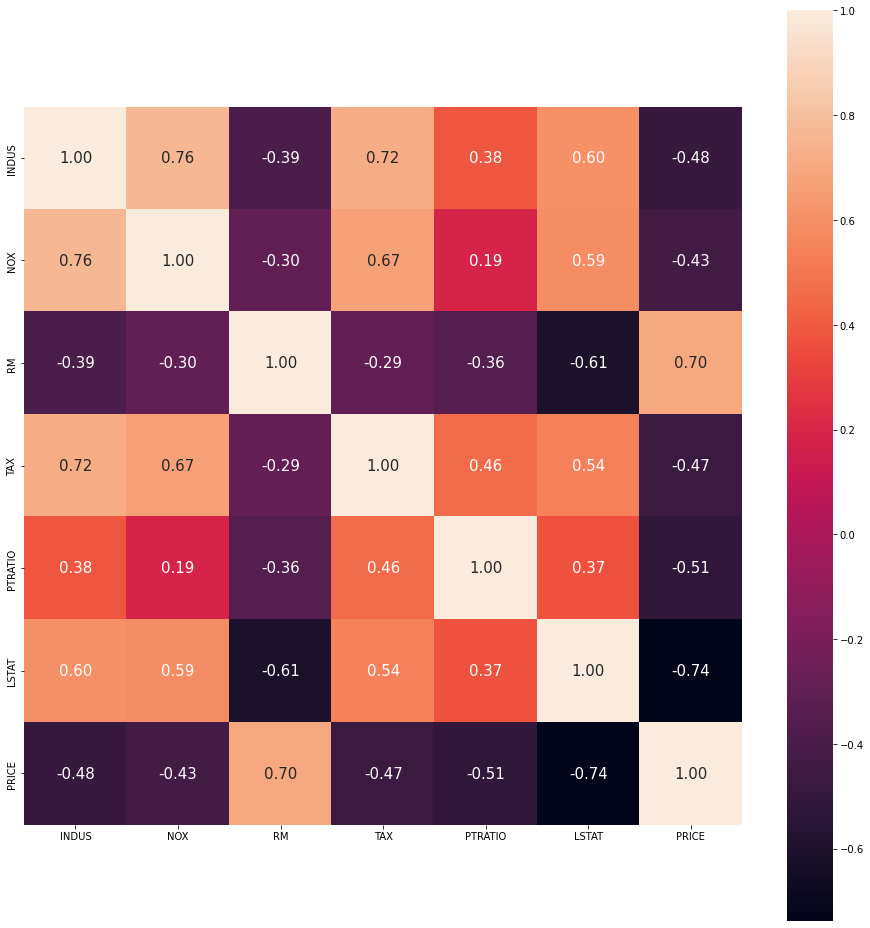

In [ ]:
# 相関係数を確認
plt.figure(figsize=(13,13))
cm = np.corrcoef(df[cols].values.T)   #相関係数を求めてるとこ
hm = sns.heatmap(cm,
                 cbar= True,    #カラーバー出力
                 annot= True,   #セルに値を出力
                 square= True,  #正方形になるように
                 fmt= '.2f',    #出力フォーマットを指定
                 annot_kws= {'size':15},
                 yticklabels= cols,
                 xticklabels= cols
                 )

plt.tight_layout()
plt.show()

In [ ]:
# 単回帰分析
# RMとPRICEがよさそう
from sklearn.linear_model import LinearRegression
X = df[['RM']].values  # 説明変数
Y = df['PRICE'].values # 目的変数

model = LinearRegression()

model.fit(X,Y)  # このモデルで学習する
y_pred = model.predict(X) # 予測をおこなう

print('傾き：', model.coef_)
print('切片：', model.intercept_)

傾き： [9.10210898]
切片： -34.67062077643857


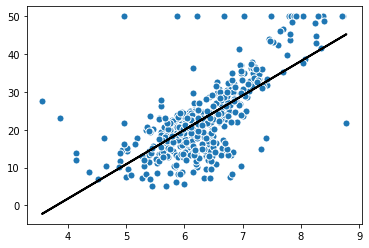

In [ ]:
# モデルをグラフ化
def lin_regplot(X, Y ,model):
  plt.scatter(X, Y, edgecolors='white', s=50)
  plt.plot(X, model.predict(X), color='black', lw=2)
  return

lin_regplot(X, Y, model)
plt.show()

# 部屋数が上がると値段も上がる，なんとなくの相関がある

In [ ]:
# 重回帰分析
#説明変数はPRICE以外のすべて
X = df.drop('PRICE', axis=1)
Y = df['PRICE']

model = LinearRegression()
model.fit(X,Y)
#model.coef_


"""
cols = ['PRICE']
cm = model.coef_.reshape(13,1)
plt.figure(figsize=(3, 7))
hm = sns.heatmap(cm,
                 cbar= True,
                 annot= True,
                 square= True,
                 fmt= '.2f',
                 annot_kws= {'size':13},
                 yticklabels= df.columns,
                 xticklabels= cols
                 )

plt.tight_layout()
plt.show()

"""

"\ncols = ['PRICE']\ncm = model.coef_.reshape(13,1)\nplt.figure(figsize=(3, 7))\nhm = sns.heatmap(cm,\n                 cbar= True,\n                 annot= True,\n                 square= True,\n                 fmt= '.2f',\n                 annot_kws= {'size':13},\n                 yticklabels= df.columns,\n                 xticklabels= cols\n                 )\n\nplt.tight_layout()\nplt.show()\n\n"

In [ ]:
# モデルの性能評価
from sklearn.model_selection import train_test_split
X = df.drop('PRICE', axis=1)
Y = df['PRICE']

# トレーニングに7，テストに3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model= LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
# 決定係数（訓練データ）
print("決定係数trainData", r2_score(y_train,y_train_pred))
# 決定係数（テストデータ）
print("決定係数testData", r2_score(y_test,y_test_pred))
# 平均二乗誤差（訓練データ）
print("平均二乗誤差trainData", mean_squared_error(y_train,y_train_pred))
# 平均二乗誤差（テストデータ）
print("平均二乗誤差testData", mean_squared_error(y_test,y_test_pred))

#平均二乗誤差，テストデータが高め→過学習？

決定係数trainData 0.7645451026942549
決定係数testData 0.6733825506400184
平均二乗誤差trainData 19.95821981423805
平均二乗誤差testData 27.195965766883308


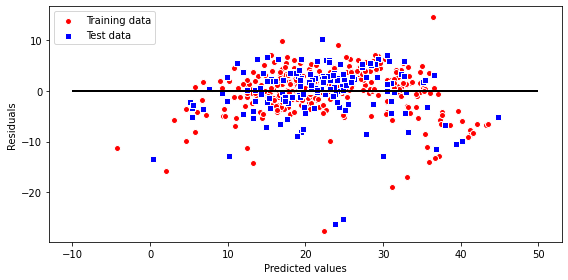

In [ ]:
plt.figure(figsize = (8,4)) 

plt.scatter(y_train_pred, y_train_pred - y_train,
                  c = 'red', marker = 'o', edgecolors='white',
                  label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
                  c = 'blue', marker='s', edgecolors='white',
                  label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10,xmax=50,color='black', lw=2)

plt.tight_layout()
plt.show()

In [ ]:
# randomforestでやってみる

from sklearn.ensemble import RandomForestRegressor
# 説明変数
Xrf = boston.data
# 目的変数
Yrf = boston.target
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(Xrf, Yrf, test_size=0.33, random_state=2)

# モデル作って学習
RF = RandomForestRegressor(n_estimators= 500,
                           criterion= 'squared_error',
                           random_state= 2,
                           n_jobs= -1
                           )
RF.fit(X_train, y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)


# モデルの性能評価
# 決定係数（訓練データ）
print("決定係数trainData", r2_score(y_train,y_train_pred))
# 決定係数（テストデータ）
print("決定係数testData", r2_score(y_test,y_test_pred))
# 平均二乗誤差（訓練データ）
print("平均二乗誤差trainData", mean_squared_error(y_train,y_train_pred))
# 平均二乗誤差（テストデータ）
print("平均二乗誤差testData", mean_squared_error(y_test,y_test_pred))

決定係数trainData 0.9782113118675326
決定係数testData 0.9028188927086416
平均二乗誤差trainData 1.7909461464306808
平均二乗誤差testData 8.642338765029994


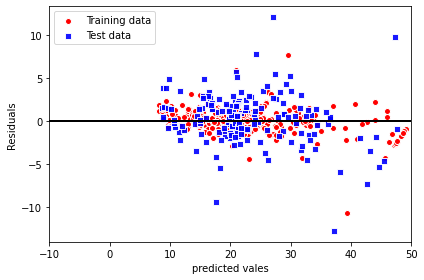

In [ ]:
plt.scatter(y_train_pred,
           y_train_pred - y_train,
           c = 'red', 
           marker = 'o', 
           edgecolors='white',       
           label = 'Training data')
plt.scatter(y_test_pred, 
           y_test_pred - y_test,
           c = 'blue', 
           marker='s',
           s= 35,
           edgecolors='white',
           alpha=0.9,
           label = 'Test data')
plt.xlabel('predicted vales')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin= -10,xmax=50,lw=2, color='black')
plt.xlim([-10,50])
plt.tight_layout()
plt.show()